# В данном приекте мы изучаем рынок российского кинопроката и выявляем текущие тренды. Так же уделим внимание фильмам, которые получили государственную поддержку. Ответим на вопрос, насколько такие фильмы интересны зрителю. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/mkrf_movies.csv')
data1 = pd.read_csv('/datasets/mkrf_shows.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
data.groupby('puNumber').count()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
puNumber,,,,,,,,,,,,,,
111004112,1,1,1,1,1,1,0,1,0,0,0,0,0,0
111000110,1,1,1,1,1,1,1,1,0,0,0,0,1,1
111000111,1,1,1,1,1,1,1,1,0,0,0,0,1,1
111000112,1,1,1,1,1,1,1,1,0,0,0,0,1,1
111000113,1,1,1,1,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226017410,1,1,1,1,1,1,0,1,0,0,0,0,1,1
226019110,1,1,1,1,1,1,1,1,0,0,0,0,1,1
231001012,1,1,1,1,1,1,1,1,0,0,0,0,1,1


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
data_test = pd.concat([data, data1], axis=1)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

In [6]:
data['puNumber'] = (
    data['puNumber']
    .replace('нет', '0', regex=True)
)

In [7]:
data['puNumber'] = data['puNumber'].astype('int64')

In [8]:
data = data.merge(data1, on = 'puNumber', how = 'outer')

In [9]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Проверив данные мы видим, что в Датафрейме data есть выбивающееся значение номера прокатоного удостоверения, видимо кто-то зашёл без него, поэтому мы заменили строковое значение числовым и соединили таблицы**
*Комментарий для ревьюера: я попробовал оба варианта, более долгий с предобработкой выбитого значения и метод который бы просто совместил таблицы, но обработать для дальнейшего анализа пришлось бы потом так или иначе*

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
data['ratings'] = data['ratings'].replace('%', '', regex=True).astype(float)

In [12]:
data = data.dropna(subset = ['ratings']).reset_index()
data['ratings'] = data['ratings']

In [13]:
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  8.2,  7.5,
        6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,  8.5,
        8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,  8.4,
        2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,  4.9,
        3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,  3.2,
        2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. , 91. ,
       94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,  1.8,
        1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [14]:
sab = data.query('ratings > 10')['ratings'] / 10

In [15]:
data.loc[data['ratings'] > 10, 'ratings'] = sab

**В предыдущем шаге мы исправили тип данных колонки 'puNumber' для возможного анализа по номеру удостоверения, тоже самое касается и колонки 'ratings'.**

In [16]:
data = data.dropna(subset = ['producer','film_studio' ,'age_restriction', 'production_country', 'director', 'ratings', 'genres']).reset_index()

<AxesSubplot:>

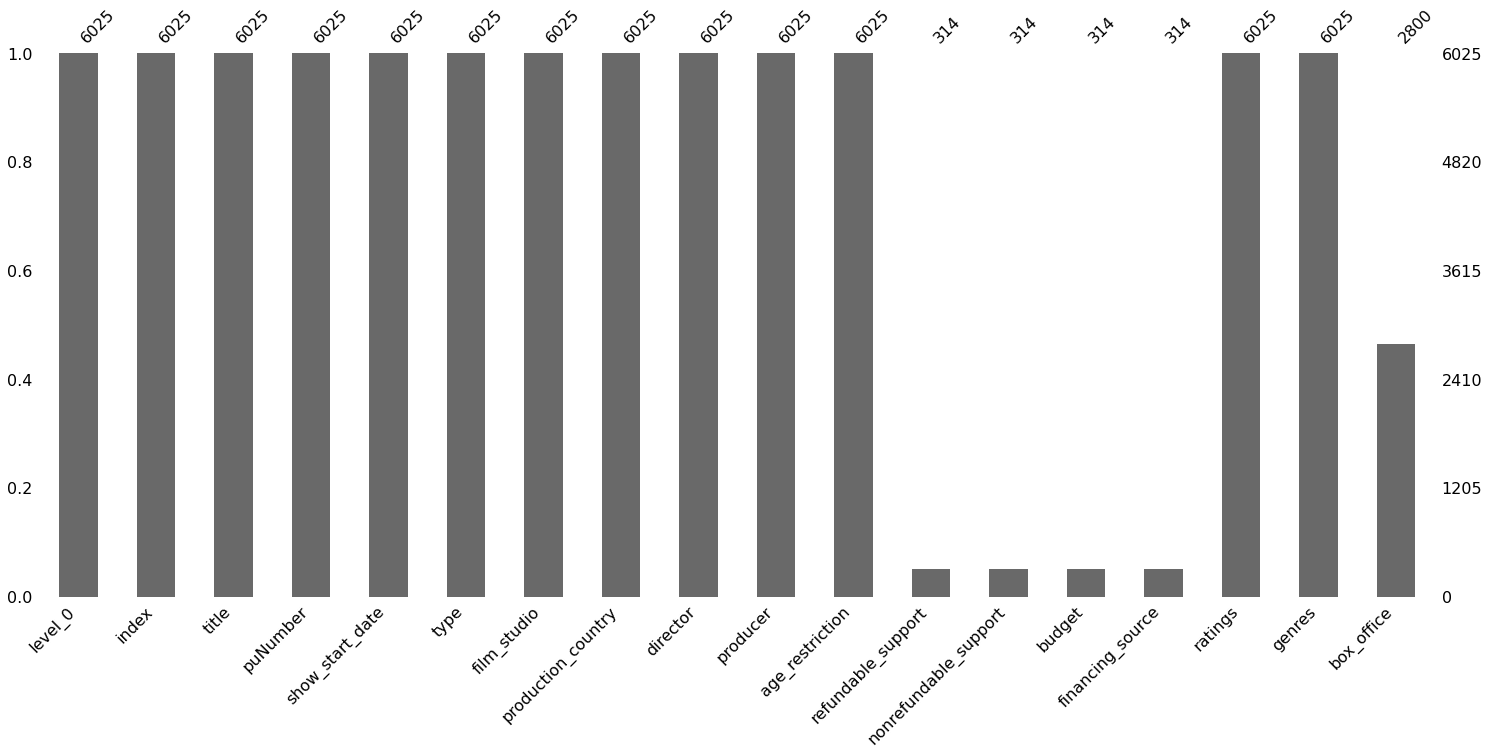

In [17]:
!pip install missingno
import missingno as msno
msno.bar(data)

In [18]:
for col in ['refundable_support', 'nonrefundable_support']:
    data[col] = data[col].fillna(0)

In [19]:
data['financing_source'] = data['financing_source'].fillna('Отсутствует')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   level_0                6025 non-null   int64  
 1   index                  6025 non-null   int64  
 2   title                  6025 non-null   object 
 3   puNumber               6025 non-null   int64  
 4   show_start_date        6025 non-null   object 
 5   type                   6025 non-null   object 
 6   film_studio            6025 non-null   object 
 7   production_country     6025 non-null   object 
 8   director               6025 non-null   object 
 9   producer               6025 non-null   object 
 10  age_restriction        6025 non-null   object 
 11  refundable_support     6025 non-null   float64
 12  nonrefundable_support  6025 non-null   float64
 13  budget                 314 non-null    float64
 14  financing_source       6025 non-null   object 
 15  rati

**Мы избавились от пропусков в датафрейме удалив строки в которых было бы невозможно логически заменить значения. В тех столбцах где говорится про гос.поддержку можно логически дойти, что пустые колонки, это фильмы без гос.поддержки, поэтому ставим 0. Так же в соответствующих строках, пишем что фильм не имеет гос.поддержки вместо пропущенного значения**

In [21]:
data['puNumber'].duplicated().sum()

2

In [22]:
data[data['puNumber'].duplicated()]

,level_0,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3789,4200,4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"драма,мелодрама,история",NaN
4184,4600,5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,6.8,"комедия,криминал",NaN


In [23]:
data.loc[4188, 'puNumber'] = '1'

In [24]:
data.loc[3792, 'puNumber'] = '2'

In [25]:
data['puNumber'].duplicated().sum()

2

**Было обнаружено два дубликата номера прокатного удостоверения. Они могли возникнуть в следствии человеческого фактора, тот кто заполнял мог вбить дважды один и тот же номер. Среди остальных столбцов нет смысла искать дубликаты, т.к так или иначе они будут повторяться. Поэтому чтобы не удалять дубликаты номеров, я их заменил, чтобы они так же учавствовали в анализе.**

In [26]:
data['type'].value_counts()

Художественный                3907
 Художественный               1181
Анимационный                   553
Прочие                         195
Документальный                 153
Научно-популярный               34
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [27]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [28]:
data['producer'] = data['producer'].str.strip()

In [29]:
for st in  ['title', 'type', 'film_studio', 'production_country', 'director', 'age_restriction', 'genres']:
    data[st] = data[st].str.lower()
    data[st] = (
        data[st]
        .str.strip()
        .str.replace(' ','_')
    )

In [30]:
for con in ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']:
    print(data[col].unique())

[0.00000000e+00 2.65000000e+07 1.07847945e+08 2.80000000e+07
 2.50000000e+07 4.65022990e+07 7.50000000e+07 3.40000000e+07
 3.00000000e+07 4.00000000e+07 2.30000000e+07 4.50000000e+07
 5.65790550e+07 2.55000000e+07 2.75100000e+07 1.00000000e+07
 2.40000000e+07 2.45000000e+07 2.70000000e+07 5.00000000e+06
 9.00000000e+07 2.60000000e+07 2.00000000e+07 7.00000000e+07
 9.70000000e+07 2.44500000e+07 5.00000000e+07 6.00000000e+07
 2.75000000e+07 2.69500000e+07 1.10000000e+08 1.00000000e+08
 1.50000000e+07 5.90000000e+07 2.50000000e+08 3.70000000e+07
 3.50000000e+07 2.01452850e+07 2.59000000e+07 6.00000000e+06
 3.92104482e+08 2.52000000e+07 2.29040000e+07 2.90000000e+07
 5.10000000e+07 4.70000000e+06 5.30000000e+06 2.17000000e+07
 2.49860000e+07 2.53450000e+07 1.33000000e+08 1.75000000e+08
 3.01239150e+07 2.85000000e+07 3.00000000e+08 4.15000000e+07
 2.00000000e+08 1.50000000e+08 5.50000000e+07 6.40000000e+07
 5.00008660e+07 1.15200000e+07 1.90000000e+08 2.25000000e+08
 8.00000000e+06 4.000000

In [31]:
for col in ['refundable_support', 'nonrefundable_support']:
    data[col] = data[col].fillna(0)

**Чтобы было возможно анализировать данные, мы избавились от лишних пробелов и привели все категоральные данные к змеиному стилю и единому регистру. Так же данные в столбцах про гос.финансирование отсутствующие данные мы заменили на 0, т.к можно логически подумать, что раз не заполнено, значит финансирования не было**

In [32]:
data.head(5)

,level_0,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,0,0,открытый_простор,221048915,2015-11-27T12:00:00.000Z,художественный,"тачстоун_пикчерз,_кобальт_пикчерз,_бикон_пикче...",сша,кевин_костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»_-_запрещено_для_детей,0.0,0.0,NaN,Отсутствует,7.2,"боевик,драма,мелодрама",NaN
1,2,2,особо_опасен,221038416,2016-10-10T12:00:00.000Z,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»_-_запрещено_для_детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
2,3,3,особо_опасен,221026916,2016-06-10T12:00:00.000Z,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»_-_запрещено_для_детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
3,4,4,особо_опасен,221030815,2015-07-29T12:00:00.000Z,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»_-_запрещено_для_детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,7,7,любовь_и_сигареты,221074614,2014-12-29T12:00:00.000Z,художественный,"юнайтед_артистс,_грин_стрит_филмз,_айкон_интер...",сша,джон_туртурро,"Джон Пенотти, Джон Туртурро",«18+»_-_запрещено_для_детей,0.0,0.0,NaN,Отсутствует,6.6,"мюзикл,мелодрама,комедия",NaN


In [33]:
data['show_start_date'] = pd.to_datetime(data.show_start_date, dayfirst=True)
data['year'] = data['show_start_date'].dt.year

In [34]:
data.tail(5)

,level_0,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
6020,6514,7476,я_свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао_""тпо_""киностудия_им._м.горького""",россия,и.северов,С.Зернов,«12+»_-_для_детей_старше_12_лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019
6021,6515,7477,тридцать,121038419,2019-12-26 12:00:00+00:00,художественный,демнехст_ауф_видео,германия,симона_костова,Джейлан Атаман-Джека,«16+»_-_для_детей_старше_16_лет,0.0,0.0,NaN,Отсутствует,6.3,драма,NaN,2019
6022,6516,7478,(не)идеальный_мужчина,111023119,2019-12-24 12:00:00+00:00,художественный,"ооо_""нон-стоп_продакшн""",россия,м.бальчюнас_(псевдоним_м.вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+»_-_для_детей_старше_12_лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN,2019
6023,6517,7482,звериная_ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел_гродник_продакшнз,_вандерфилм_медиа_кор...",сша,ник_пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+»_-_для_детей_старше_16_лет,0.0,0.0,NaN,Отсутствует,5.4,"боевик,триллер",NaN,2019
6024,6518,7485,"машины_песенки._серия_""когда_цветут_кактусы""",124010719,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд_лтд.,_ооо_студия_""анимаккорд""","республика_кипр,_россия",и.трусов,Д.Ловейко,«0+»_-_для_любой_зрительской_аудитории,0.0,0.0,NaN,Отсутствует,6.3,"комедия,вестерн",NaN,2019


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [35]:
def main(row):
    values = row.split(',')
    return values[0]
data['main_producer'] = data['producer'].apply(main)
data['main_genre'] = data['genres'].apply(main)

In [36]:
data.head(5)

,level_0,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,...,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre
0,0,0,открытый_простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун_пикчерз,_кобальт_пикчерз,_бикон_пикче...",сша,кевин_костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",...,0.0,0.0,NaN,Отсутствует,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик
1,2,2,особо_опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",...,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
2,3,3,особо_опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",...,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
3,4,4,особо_опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал_пикчерз,_кикстарт_продакшнз,_марк_пл...",сша,тимур_бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",...,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2015,Джим Лемли,фантастика
4,7,7,любовь_и_сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед_артистс,_грин_стрит_филмз,_айкон_интер...",сша,джон_туртурро,"Джон Пенотти, Джон Туртурро",...,0.0,0.0,NaN,Отсутствует,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Пенотти,мюзикл


**Сделав функцию мы вывели главных Продюсеров и основные жанры фильмов (для справки хотел отметить, что если я правильно понимаю задание, то там пишется режисёров, а Режисёров тут итак по одному значению, возможно имелось ввиду продюссеров)**

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [37]:
data['fund_piec'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [38]:
fund_piec = data.dropna(subset = ['fund_piec']).head(5)

In [39]:
fund_piec['fund_piec'].mean()

0.5486824774358487

**В среднем гос.поддержка составляет около половины всего бюджета фильма**

**Проведя Предобработку данных, мы подготовили их к дальнейшему анализу. Теперь мы можем спокойно анализировать рейтинг, производить разбивку по году выпуска, жанрам и режиссёрам. Всё это может нам пригодится в дальнейшем анализе. Так же мы избавились от "плохих" данных и пропусков**

In [40]:
data['year'].min(), data['year'].max()

(2010, 2019)

<AxesSubplot:title={'center':'Год выхода фильма'}, ylabel='Frequency'>

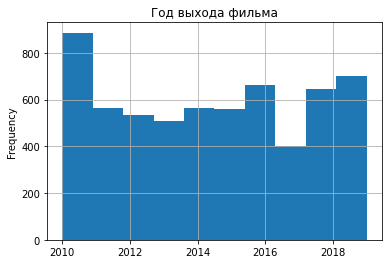

In [41]:
data['year'].plot(kind = 'hist', bins = 10, title='Год выхода фильма', grid = True)

<AxesSubplot:title={'center':'Наличие прокатной информации'}, xlabel='year'>

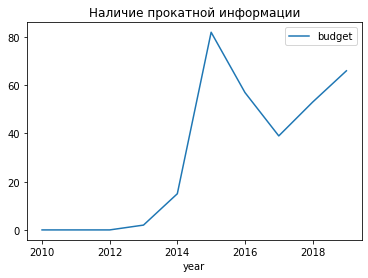

In [42]:
(
    data.pivot_table(index = 'year', values = 'budget', aggfunc = 'count')
    .plot(title='Наличие прокатной информации')
)

**Тут мы можем заметить, что большме всего фильмов выходило в 2010 году, потом их число резко снизилось и постепенно начало повышаться к 2018 году. Так же большая часть отсутствующих данных прокатных данных, так же приходится на 2010 год.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)
#Я воспользовался подсказкой, но честно говоря, интересно, как ещё можно было бы изменить формат выводимых чисел

In [44]:
sub = data.query('year < 2014')['box_office']*100
data.loc[data['year'] < 2014, 'box_office'] = sub

In [45]:
data.groupby('year')['box_office'].sum()

year
2010     241425400.00
2011     204977000.00
2012     686249800.00
2013    2941964420.00
2014    7311223990.30
2015   37852586035.37
2016   45802307850.76
2017   46116786572.50
2018   46776164715.43
2019   48253561271.12
Name: box_office, dtype: float64

In [46]:
cash = data.query('box_office > 0')
cash = cash.dropna(subset = ['box_office'])

In [47]:
cash['box_office'].describe()

count         2783.00
mean      84867857.37
std      253387489.86
min            100.00
25%         548360.00
50%        3695157.08
75%       33437803.32
max     3073568690.79
Name: box_office, dtype: float64

**Слишком большая разница, стоит проверить на выбросы**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf52a4f3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf52a4fa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf52a4f040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf52a44160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf52a444c0>],
 'means': []}

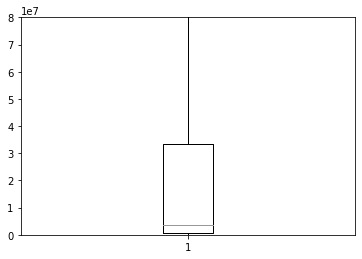

In [48]:
plt.ylim(0, 80000000)
plt.boxplot(cash['box_office'])

<AxesSubplot:title={'center':'Сборы фильмов в каждом году'}, xlabel='year'>

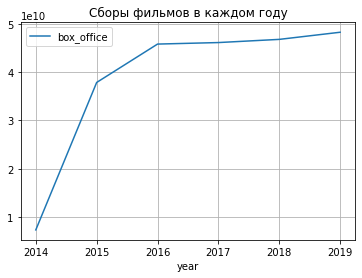

In [49]:
(
    cash
    .query('year > 2013')
    .pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
    .plot(grid = True, title='Сборы фильмов в каждом году')
)

**Судя по динамике прокатных данных, мы видим, что минимальные сборы были в 2014 году были самые маленькие сборы**

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:title={'center':'Среднее и медианное значение сборов каждого года'}, xlabel='year'>

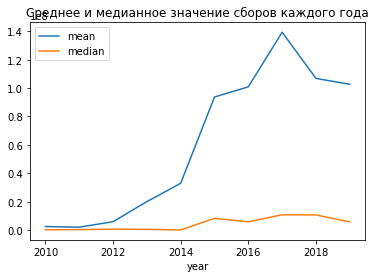

In [50]:
(
    cash
    .pivot_table(index = 'year', values = 'box_office', aggfunc = ('mean', 'median'))
    .plot(title='Среднее и медианное значение сборов каждого года')
)

**Тут можно наблюдать, что кол-во сборов увеличивалось не переставая с 2010 года, по 2018. В 2019 же сборов стало вдвое меньше чем в предыдущем году. Но при этом есть резкий подъём среднего значения, но при этом плавный подъём медианного. Это может быть из-за вышедших блокбастеров, которые могли иметь астрономические сборы.**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [51]:
cash.groupby(by = 'year')['box_office'].sum()

year
2010     241425400.00
2011     204977000.00
2012     686249800.00
2013    2941964420.00
2014    7311223990.30
2015   37852586035.37
2016   45802307850.76
2017   46116786572.50
2018   46776164715.43
2019   48253561271.12
Name: box_office, dtype: float64

In [52]:
(
    cash
    .query('year >= 2015')
    .pivot_table(index = 'age_restriction', columns = 'year', values = 'box_office', aggfunc = 'sum')
)

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+»_-_для_любой_зрительской_аудитории,327577365.24,79924770.56,228657142.00,4111901.28,13779632.32
«12+»_-_для_детей_старше_12_лет,13328485767.21,12187723893.55,7348597446.66,12453262305.68,12663649987.77
«16+»_-_для_детей_старше_16_лет,11062928961.17,15958033401.51,17840387633.06,15502100973.48,12713458001.99
«18+»_-_запрещено_для_детей,5269078722.64,6764812402.30,9620582164.02,8729020058.44,10072280971.25
«6+»_-_для_детей_старше_6_лет,7864515219.11,10811813382.84,11078562186.76,10087669476.55,12790392677.79


**Судя по всему, наибольшие сборы собирали фильмы для детей старше 16 лет, наименьшие же фильмы для любой зрительской аудитории. Я так думаю, это из-за того, что 16 лет это наиболее заинтересованная аудитория, плюс фильмы там самые уравновешенные и подходящие для многих, в то время как "0+" это чаще всего мультики на столько детские, что подходят только совсем маленьким детям, а "18+" чаще всего содержат кадры или высказывания, которые далеко не всем будут приятны. Почти на равне с "16+" идёт "12+" рейтинг. Фильмы "12+" можно считать семейными и на них часто ходят всей семьёй, поэтому они собирают хорошие сборы.**

In [53]:
gos = data.query('financing_source != "Отсутствует" and budget > 0')

In [54]:
gos['budget'].describe()

count          298.00
mean     137683808.56
std      195645169.98
min       14462464.00
25%       46168856.75
50%       75470538.00
75%      154803696.75
max     2305074303.00
Name: budget, dtype: float64

<AxesSubplot:title={'center':'Бюджет фильмов с Гос.поддержкой'}, ylabel='Frequency'>

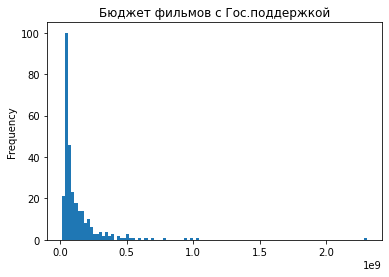

In [55]:
gos['budget'].plot(kind = 'hist', bins = 100, title='Бюджет фильмов с Гос.поддержкой')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf50c82160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf50c82820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf50c72dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf50c82ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf50c8c280>],
 'means': []}

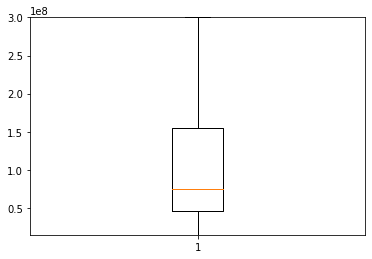

In [56]:
plt.ylim(15000000, 300000000)
plt.boxplot(gos['budget'])

<AxesSubplot:title={'center':'Бюджет фильмов с Гос.поддержкой'}, ylabel='Frequency'>

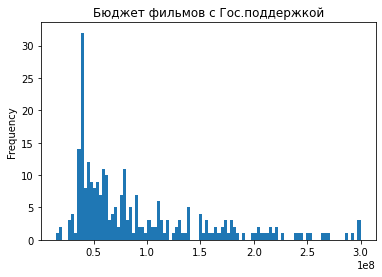

In [57]:
gos['budget'].plot(kind = 'hist',bins = 100, range = (15000000, 300000000), title='Бюджет фильмов с Гос.поддержкой')

**Тут мы выяснили, что большая часть фильмов с гос.поддержкой имеет около 15-20млн бюджетных денег**

In [58]:
(
    gos.query('15000000 <= budget <= 300000000')
    .pivot_table(index = 'budget', values = 'box_office')
)


,box_office
budget,
15010000.00,1957979.50
18166418.00,270497.00
27000000.00,1109238.00
28115580.00,2323980.00
28571429.00,1572434.50
...,...
270000000.00,387590521.72
287802711.00,51704986.00
292412422.00,87707397.08


In [59]:
def payback (row):
    box = row['box_office']
    budget = row['budget']
    if box >= budget:
        return 'окупился'
    return 'не_окупился'

In [60]:
cash['payback'] = cash.apply(payback, axis =1)

In [61]:
cash['payback'].value_counts()

не_окупился    2702
окупился         81
Name: payback, dtype: int64

**Фильмы с гос.поддержкой плохо окупаются, возможно из-за плохого выбора самих фильмов, либо плохим использования бюджета, давайте проверим какие там рейтинги**

In [62]:
cash['ratings'].median()

6.3

**Рейтинг фильмов с гос.поддержкой тоже оставляет желать лучшего, Видимо это причина плохой окупаемости**

In [63]:
cash.groupby(by = 'age_restriction')['age_restriction'].count()

age_restriction
«0+»_-_для_любой_зрительской_аудитории     175
«12+»_-_для_детей_старше_12_лет            433
«16+»_-_для_детей_старше_16_лет           1011
«18+»_-_запрещено_для_детей                838
«6+»_-_для_детей_старше_6_лет              326
Name: age_restriction, dtype: int64

**Мало вложений идёт на фильмы "семейные", с возрастной категорией 12+, это было бы хорошим решением**

In [64]:
cash.groupby(by = 'main_genre')['main_genre'].count().sort_values()

main_genre
короткометражка      1
для_взрослых         1
реальное_тв          1
фильм-нуар           1
концерт              2
музыка               3
вестерн              5
спорт                6
криминал            15
мюзикл              16
семейный            18
детский             19
история             19
биография           20
военный             21
детектив            21
аниме               25
приключения         31
документальный      95
мелодрама          108
фэнтези            138
фантастика         173
триллер            214
боевик             228
ужасы              264
мультфильм         336
комедия            356
драма              646
Name: main_genre, dtype: int64

**Больше всего средств идёт на спонсирование драмм, что тоже может иметь свои причины плорхой окупаемости**

In [65]:
cash.groupby(by = 'production_country')['production_country'].count().sort_values()

production_country
cша                     1
польша                  1
франция_-__бельгия      1
пакистан                1
оаэ_-_сша               1
                     ... 
италия                 47
великобритания         75
франция               147
россия                668
сша                   814
Name: production_country, Length: 517, dtype: int64

# По итогам анализа стало ясно, что фильмы спонсирующие гос.поддержкой мало того что не сильно интересны зрителю, так ещё и имеют плохой рейтинг и плохую окупаемость. В целом, с каждым годом сборы только увеличиваются. Так же можно заметить динамику развития фильмов для детей (категория 6+) и семейные (категория 12+), эти две категории начали идти на равне с самой кассовой категорией, от чего можно сделать вывод, что в ближайшие годы их сборы будут только расти.